# Introduction
This notebook will explore the kaggle datasets in the [Donors Choose Challenge](https://www.kaggle.com/donorschoose/io).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [2]:
# Univariate Table Exploration
def introexplore(csv):
    print(csv.info())
    
    _, length = csv.shape
    print('\n', 'Dataset Dimensions')
    print(_, length)

    for i in range(length):
        print('\n', csv.columns[i])
        print(csv.iloc[:, i].value_counts().head())

# Donors Data Exploration

In [3]:
donors = pd.read_csv('../input/Donors.csv')
donors_c = donors.copy() # cleaned dataframe

C:\Users\Karsten\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
introexplore(donors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122640 entries, 0 to 2122639
Data columns (total 5 columns):
Donor ID            object
Donor City          object
Donor State         object
Donor Is Teacher    object
Donor Zip           object
dtypes: object(5)
memory usage: 81.0+ MB
None

 Dataset Dimensions
2122640 5

 Donor ID
1e3a15c1ef96a71a8bd404d2b3042a68    1
df22196108b21169c345faeda2f19006    1
0e4dc3605e4efca3218058a774ffbee3    1
cafacc4a4c939998cadba3b7e89ba798    1
1a9a509a83389081c8e131a57ef2781c    1
Name: Donor ID, dtype: int64

 Donor City
Chicago          34352
New York         27863
Brooklyn         22330
Los Angeles      18320
San Francisco    16925
Name: Donor City, dtype: int64

 Donor State
California    294695
New York      137957
Texas         134449
Florida       108828
other         107809
Name: Donor State, dtype: int64

 Donor Is Teacher
No     1910355
Yes     212285
Name: Donor Is Teacher, dtype: int64

 Donor Zip
606    34628
945    31408
100    26461

From this we can see infer that:
- The first column is unique for every donor. This is the primary key.
- Majority of donors from a single city are from Chicago, about the same size as 4, 5 combined.
- The state that donates the most is California
- Most of the donors are not teachers
- The zip codes show that the most donations again is from Chicago. It is odd how there are more donors with the 606 zip code than there are people. 

### Checking Zipcode and City data disconnect

In [8]:
# Check whether the zipcode and city difference are correct.
donors.loc[donors['Donor Zip'] == 606 , 'Donor City'].value_counts()

Chicago    409
Name: Donor City, dtype: int64

In [9]:
donors['Donor Zip'].value_counts().head()

606    34628
945    31408
100    26461
112    21862
900    18448
Name: Donor Zip, dtype: int64

In [10]:
donors[donors['Donor Zip'] == 606 ]['Donor State'].value_counts()

Illinois         414
other              2
Wisconsin          2
Massachusetts      1
Name: Donor State, dtype: int64

This is odd, not only am I not seeing all of the 34628 results that I was expecting, but there were other states excluding Illinois that had the zipcode of 606. The zip may not match the city, and the city may not match the state. I'll move on. 

In [11]:
donors[donors['Donor Zip'] == '606' ]['Donor State'].value_counts().head()

Illinois      33998
other           200
California       42
Michigan         34
New York         32
Name: Donor State, dtype: int64

The reason for the second mismatch is due to the difference in data types. There are both floats and strings. This needs to be corrected.
#### Code
Convert Donor Zip to a uniform datatype

In [12]:
donors_c['Donor Zip'] = donors_c['Donor Zip'].astype(str)

In [13]:
donors_c[donors_c['Donor Zip'] == 606 ]['Donor State'].value_counts()

Series([], Name: Donor State, dtype: int64)

In [14]:
donors_c[donors_c['Donor Zip'] == '606' ]['Donor State'].value_counts().head()

Illinois      33998
other           200
California       42
Michigan         34
New York         32
Name: Donor State, dtype: int64

The issue is not corrected as Illionois still has 33998 entries. 

In [15]:
# find a positive 606 value in original dataset
donors[donors['Donor Zip'] == 606 ].head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
2097169,fcec355708107df1c0f328efc9255f48,Chicago,Illinois,No,606
2097247,fcee706a53fe736b3a890997f6c5d02b,Chicago,Illinois,No,606
2097256,fceecae4aad15bd1abe705842fdf6f7c,Chicago,Illinois,Yes,606
2097314,fcf02f40fb757d37f8130b9538340c18,Chicago,Illinois,No,606
2097378,fcf217a4ea8117c3c8e3759f96f75c4f,Chicago,Wisconsin,No,606


In [16]:
# Pull up the same value in the "cleaned" dataset
donors_c.iloc[2097169, :]


Donor ID            fcec355708107df1c0f328efc9255f48
Donor City                                   Chicago
Donor State                                 Illinois
Donor Is Teacher                                  No
Donor Zip                                      606.0
Name: 2097169, dtype: object

In [17]:
donors_c.iloc[2097169, 4]

'606.0'

The issue that we have now is that the float was converted to a string, but it still has the .0 around the number.     
To bypass this issue, I will convert the original series to integers before converting the results to a string. 

In [18]:
try:
    donors_c['Donor Zip'] = donors_c['Donor Zip'].astype(int).astype(str)
except:
    print("ValueError: invalid literal for int() with base 10: 'nan'")

ValueError: invalid literal for int() with base 10: 'nan'


Another issue that arises is that now we have NaN that cannot be converted to integers. I will check out those datapoints. 

What I want to do is
if the value is a float, convert it into an integer to remove the .0 and then convert that into a string

I could also just directly convert the results into a string, and remove all .0. 

In [19]:
donors_c = donors.copy()

In [20]:
donors_c.loc[donors_c['Donor Zip'].notnull(), 'Donor Zip'].value_counts().tail(20)

962.0    1
969.0    1
127.0    1
NG2      1
T3H      1
E2E      1
192      1
NC       1
896      1
n19      1
311.0    1
N3L      1
533      1
V4C      1
CB3      1
V3J      1
518      1
N6J      1
143.0    1
V7J      1
Name: Donor Zip, dtype: int64

In [7]:
donors_c.loc[donors_c['Donor Zip']== 'n19', :]

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
1202049,90eca78b60eb64dae6fd284c7f0058eb,NaN,other,No,n19


After looking at the results of all the mistyped data, it would be too much of a hassle to complete, and the minor difference in certain cities would be negligible. In addition there are zip codes that are mixed with letters and numbers. The extra error from using the zipcode as a predictive feature could be mitigated by using the cities, or the fact that zipcodes are unique and will be a categorical variable. 

With that said, I will remove the donors clean dataset to free up space.

In [21]:
del donors_c

### Are Teachers more likely to Donate?
Wise geek quotes BLS (Bureau Labor Statistics) of the US that teachers comprise 2% of the US population. [Link](http://www.wisegeek.com/what-percent-of-the-us-population-do-teachers-comprise.htm)    
But in the result below, we see that 10% of the donors are teachers. This five times the amount relative to the US population. 

In [22]:
prop = donors['Donor Is Teacher'].value_counts(normalize=True)
print(prop)

No     0.89999
Yes    0.10001
Name: Donor Is Teacher, dtype: float64


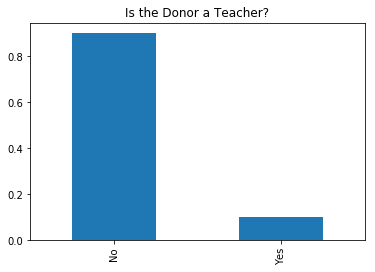

In [23]:
prop.plot(kind='bar')
plt.title('Is the Donor a Teacher?')
plt.show()

In [24]:
donors[donors['Donor Zip'].isnull()].count()

Donor ID            180060
Donor City               0
Donor State         180060
Donor Is Teacher    180060
Donor Zip                0
dtype: int64

From this we can see that there are 180060 anonymous donations. This is likely a dead end, there are a lot of anonymous donations. 

Out of curiousity I looked to see if there were any difference in anonymous locations and the donor being a teacher. Apparently more of the donors were teachers. They were about 50% more likely to be a teacher if they had an anonymous location. 

It was also interesting that though the city and the zip code were omitted, around 50% of the state information was still held. 

In [25]:
prop = donors.loc[donors['Donor Zip'].isnull(), 'Donor Is Teacher'].value_counts(normalize=True)
prop

No     0.841125
Yes    0.158875
Name: Donor Is Teacher, dtype: float64

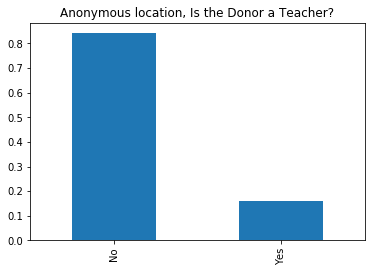

In [26]:
prop.plot(kind='bar')
plt.title('Anonymous location, Is the Donor a Teacher?')
plt.show()

In [27]:
donors.loc[donors['Donor Zip'].isnull(), 'Donor State'].value_counts(normalize=True).head()

other         0.514701
California    0.079285
Texas         0.035233
New York      0.033844
Illinois      0.025964
Name: Donor State, dtype: float64

### Donors Location Visualization

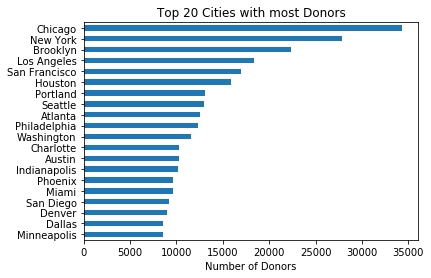

In [28]:
donors['Donor City'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Cities with most Donors')
plt.xlabel('Number of Donors')
plt.gca().invert_yaxis()

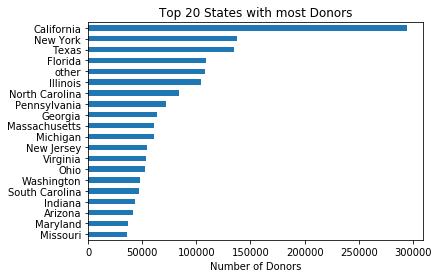

In [29]:
donors['Donor State'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 States with most Donors')
plt.xlabel('Number of Donors')
plt.gca().invert_yaxis()

In [30]:
%reset

# Donations Data Exploration
This dataset contains information about donations made, the amount, the project ID, the Donor ID, and other metadata.

We will look to see where donors donate to, and try to connect this to any other articles that have theory to explain any relationships between donations and donors. 

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [32]:
donations = pd.read_csv('../input/Donations.csv')
donations.columns

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date'],
      dtype='object')

In [33]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [34]:
# Univariate Table Exploration

_, length = donations.shape
print('Shape')
print(_, length)

for i in range(length):
    print('\n', donations.columns[i])
    print(donations.iloc[:, i].value_counts().head())

Shape
4687884 7

 Project ID
c34218abf3fecd36be01305d67ed7fbb    863
d6a260b9099aabdac7f5cb620c7481e6    663
a720b2e32df79c52f8926bb00060b3f6    631
a7028bc2602104e658ef72db1b9ca520    600
ea99d0493c7c668890eca8f7a8b38fb9    538
Name: Project ID, dtype: int64

 Donation ID
934a389700b9724c581f7b0d999f61c0    2
ec7fedbc05656a1675898e325598101a    2
d93a8bb381345d10c75aa6e590eae257    2
743f2ee0afd4de20f2b519768ce170c7    2
db4e7e6139d5fcd9bca691de1aa212f6    2
Name: Donation ID, dtype: int64

 Donor ID
39df9399f5384334a42905bcf0acdcbf    18035
237db43817f34988f9d543ca518be4ee    14565
a0e1d358aa17745ff3d3f4e4909356f3    10515
6f74ffb17cbb2b616b1eef06bd4acd0c     9029
a1929a1172ad0b3d14bc84f54018c563     6427
Name: Donor ID, dtype: int64

 Donation Included Optional Donation
Yes    4001709
No      686175
Name: Donation Included Optional Donation, dtype: int64

 Donation Amount
25.0     915951
50.0     809289
10.0     446984
1.0      354055
100.0    333150
Name: Donation Amount, dtype: in

## Donors and their Donations
We can see which donors donate the most by aggregating the count of their ID and compare that to their project ID as well as finding out their demographics. 

I want the first column to be the donor id, the second column to the count of donations, and the third column to be the total amount of money donated. 

In [35]:
fdonor = donations.groupby('Donor ID')['Donation Amount'].agg(['count', 'sum']).sort_values('count', ascending=False).head(10)
fdonor

,count,sum
Donor ID,,
39df9399f5384334a42905bcf0acdcbf,18035,37121.72
237db43817f34988f9d543ca518be4ee,14565,84625.62
a0e1d358aa17745ff3d3f4e4909356f3,10515,1879624.97
6f74ffb17cbb2b616b1eef06bd4acd0c,9029,9436.00
a1929a1172ad0b3d14bc84f54018c563,6427,28282.87
19f24640d9da49f6f8b4c9938c049591,6153,33387.68
24ecca49933c30a0beb83090591720c0,5688,40907.85
6a35a7514005c04f8520e5d8f7657d91,5494,28219.41
b51c76411b51751f45527c63c69ead9e,5141,16698.23


There are several donors that donate very frequently, but their donation sum is low, some donate about a dollar each time. Also from this we can see that it seems like corporations donate using one account. 

It would be worth exploring if they donate to the same types of organizations. 
Looking back at the univariate table exploration, we can see that based on counts of different project IDs, that the corporations typically donate to an assortment of projects. This does not rule out the the projects could be one group. 

#### Visualizations
Since this is on Kaggle, might as well slip in a graphical visualization. 
One donor was severely cut off for sum of donations, but you can see that the top donors do not have any pattern. 

(0, 100000)

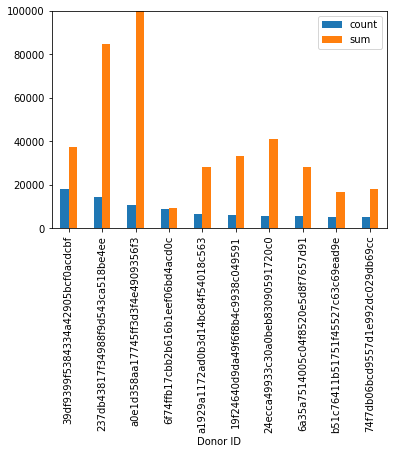

In [36]:
fdonor.plot(kind='bar')
plt.ylim((0,100000))

It would be fun to keep exploring this dataset, but I currently do not believe that there are insights about the connection between donors and projects except by joining project and donors.    
With that said, I will not explore insights such as the rate of donation, and donation included optional amount, etc.

The next item to look at in the donations dataset is which projects are connected to which donors. 
The projects would also have to be connected with the project description to see whether certain topics are most relevant to certain donors. 

After typing this out, I do believe the frequency of donations can be used to classify a donor as a frequent donor, which may affect who they donate to. 

### Donors and Projects
I will group donors and the number of projects together and look for patterns of behavior. 

In [37]:
donations.groupby('Donor ID')['Project ID'].value_counts().head(10)

Donor ID                          Project ID                      
00000ce845c00cbf0686c992fc369df4  5bab6101eed588c396a59f6bd64274b6    1
00002783bc5d108510f3f9666c8b1edd  9db61b1b1e43a7b256eec9b20b42d854    1
00002d44003ed46b066607c5455a999a  2f53e5f31890e647048ac217cda3b83f    2
                                  e09933470f4256cc2643341c1d299e55    2
                                  2f7996f08052785e9b146f72c0c4990d    1
                                  64f54f1efcbeb986114a7a13e6b27257    1
                                  75131d2e94930082aa8ed1e4cd4d21da    1
                                  c5821d32012efd7df4f6fa12e230e991    1
                                  dfdaf35bb33f9c105530c82984960ff3    1
                                  e2beb818569f66adaa4ced21ca299ac6    1
Name: Project ID, dtype: int64

This groupby expression shows the project ID's donated to for each donor, and in the number of frequency. The first two donor ID's show that they donated to only one project each. The third donor donated to two projects twice, and the remaining projects only once. 

## Donation Amounts
Explore the number donated. I saw a unique pattern in what was donated.
In economics this could be described as the strength of defaults. By placing a number down for the individual, you can help incentivize the donation of a certain amount. The default cutoff stopped at 2 dollars and onwards. 

In [38]:
donations['Donation Amount'].value_counts().head(10)

25.0     915951
50.0     809289
10.0     446984
1.0      354055
100.0    333150
20.0     288549
5.0      160678
2.0       82240
15.0      81764
30.0      72532
Name: Donation Amount, dtype: int64

Text(0.5,0,'Dollars Donated')

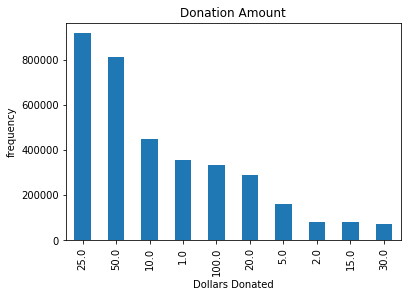

In [39]:
default = donations['Donation Amount'].value_counts().head(10)
default.plot(kind='bar')
plt.title('Donation Amount')
plt.ylabel('frequency')
plt.xlabel('Dollars Donated')

In [40]:
def percentdonationoptional(num):
    print('\n', f'{num} dollars')
    print(donations.loc[donations['Donation Amount'] == num, 'Donation Included Optional Donation'].value_counts())
    print('percentage')
    print(donations.loc[donations['Donation Amount'] == num, 'Donation Included Optional Donation'].value_counts(normalize=True))

In [41]:
print(donations['Donation Included Optional Donation'].value_counts())
print('percentage')
print(donations['Donation Included Optional Donation'].value_counts(normalize=True))

Yes    4001709
No      686175
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.853628
No     0.146372
Name: Donation Included Optional Donation, dtype: float64


In [42]:
for i in default.index:
    percentdonationoptional(i)


 25.0 dollars
Yes    834977
No      80974
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.911596
No     0.088404
Name: Donation Included Optional Donation, dtype: float64

 50.0 dollars
Yes    719627
No      89662
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.889209
No     0.110791
Name: Donation Included Optional Donation, dtype: float64

 10.0 dollars
Yes    386742
No      60242
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.865226
No     0.134774
Name: Donation Included Optional Donation, dtype: float64

 1.0 dollars
Yes    291077
No      62978
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.822124
No     0.177876
Name: Donation Included Optional Donation, dtype: float64

 100.0 dollars
Yes    277524
No      55626
Name: Donation Included Optional Donation, dtype: int64
percentage
Yes    0.83303
No     0.16697
Name: Donation Included Optional Donation, dtype: float64

 

#### Insights
It is a bit messy, but since it is not crucial to discorving whether a person will donate for this project, I will leave it at that. 
What can be taken away from this is that looking at donations 25, 10, and 5 you can see a drastic change in the included optional donation. It was 0.08%, 0.16%, and 0.26% respectively for when the donation did not include an optional donation. This shows when more of the options were left up to the person, they gravitated towards mentally familiar results. This can be more explored in game theory for economics. 

After looking at discussions about this topic, I believe that I created a false correlation. The corrected detail about that variable is the following:     
When making a donation, a donor can choose to allocate part of that amount to the DonorsChoose.org team. Every donation has a 15% optional donation by default, and they can choose to change that on the cart page in checkout.

The donation is made towards the team. Those who have no did not donate to the team and donated only to the cause. 

## Donor Cart
A donor can pay for multiple donations at once, in one payment cart. "Donor Cart Sequence" is the donor's nth time that they've checked out and paid.

Therefore, this number is strictly the number of times that a person went through the donation cycle, and is distinct from the actual projects donated to. Therefore, donor cart sequence is a subset of projects donated to. 

## Donation Received Date


In [43]:
donations["Donation Received Date"] = donations["Donation Received Date"].astype("datetime64[ns]")

Text(0,0.5,'Counts')

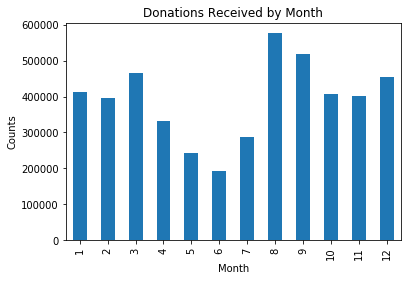

In [44]:
# donations['Donation Received Date'].value_counts().plot(kind='bar')
# The code above will kill the computer since there are too many bars to create. Friendly Warning
donations['Donation Received Date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Donations Received by Month')
plt.xlabel('Month')
plt.ylabel('Counts')

From the bar graph above, you can see that most donations are received in August and September, with two more frequent months in December and March. This agrees with previous data that shows that a large population of donations are made from teachers. In addition, if this were only the US it would fall in line with the culture of Christmas. 

I do not have an explanation for the low amount of donations in the Summer months, but it could be due to summer vacation and the idea of spending for yourself or on luxuries. 

In [45]:
%reset

# Schools Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [3]:
schools = pd.read_csv('../input/Schools.csv')
introexplore(schools)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72993 entries, 0 to 72992
Data columns (total 9 columns):
School ID                       72993 non-null object
School Name                     72993 non-null object
School Metro Type               72993 non-null object
School Percentage Free Lunch    71852 non-null float64
School State                    72993 non-null object
School Zip                      72993 non-null int64
School City                     72766 non-null object
School County                   72991 non-null object
School District                 72993 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 5.0+ MB
None

 Dataset Dimensions
72993 9

 School ID
ec7a9926fc7d9699d6f3eb8a3c43f2c0    1
41a4e0d39697ac6e427dfb5e71e362a4    1
bef95dae081415ffda7e0364dd67d638    1
00d128cdcccc2778080faff3953f92bb    1
5ad0c77edb6ff1c3ffa5cb9754da66c1    1
Name: School ID, dtype: int64

 School Name
Lincoln Elementary School       203
Washington Elementary School

Looking at this the summary, we can see that 
- the unique identifier is the school id.
- School names are frequently reused and may not be as important.
- We have the school metro type, which can be explored using a bar graph.
- the percentage of students who qualify for free lunch.
- school state, zipcode, county, district and city, all show location. 
    - It is interesting how the los angeles school district exceeds the schools in los angeles. Perhaps the district is larger than the city and the county. 


In [4]:
# look at interesting columns
intcolumns = [2, 3, 4, 6, 7, 8]

In [21]:
def plotgrids(df, columns):
    
    fig = plt.figure(figsize=(15, 15))
    head = 10
    colnum = 3
    
    for i in range(len(columns)):
        
        increment = 0
        if len(columns)%colnum != 0:
            increment = 1
            
        rownum = len(columns)//colnum + increment
        graphnum = int(f'{rownum}{colnum}{i+1}')
        plt.subplot(graphnum)
        df.iloc[:, columns[i]].value_counts(normalize=True).head(head).plot(kind='bar')
        plt.title(df.iloc[:, columns[i]].name)

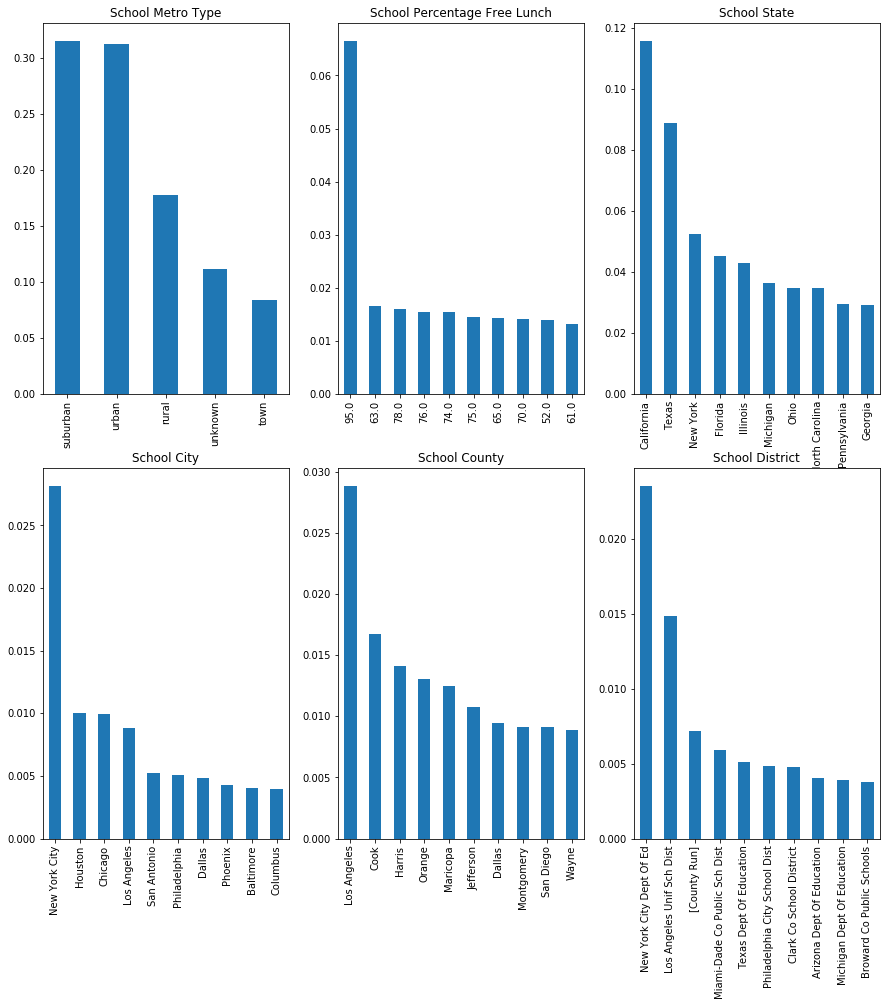

In [22]:
plotgrids(schools, intcolumns)

The graphs show that there is a lot to explore in bivariate graphs, for instance which city has the highest percentage of students qualifying for free lunches. That can be explored later, but it does not directly benefit the prediction of whether a donor will make a donation.

What can be immediately explored is whether the location of the school that has the project affect the donor.    
To put it simply, would donors be more likely to donate to schools near themselves? What about where the person is from?

# Resources Data Exploration

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [24]:
resources = pd.read_csv('../input/Resources.csv')
introexplore(resources)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210448 entries, 0 to 7210447
Data columns (total 5 columns):
Project ID              object
Resource Item Name      object
Resource Quantity       float64
Resource Unit Price     float64
Resource Vendor Name    object
dtypes: float64(2), object(3)
memory usage: 275.1+ MB
None

 Dataset Dimensions
7210448 5

 Project ID
07a021f92447be2ef4a6cb955bc4c1d1    367
b2304d2fed2cdb4aecea50c1e35171b4    366
61f7be7e54e1042757e4f844b8109a9d    340
544533ba75f043705223fe34864798e5    322
ceafa826becef13d4d7bfe08a012d76b    301
Name: Project ID, dtype: int64

 Resource Item Name
trip                                                                21233
standard shipping                                                   11467
apple&#174; ipad&#174; mini wi-fi - tablet - ios 6 - 16 gb - 7.9    10916
wonder                                                               6760
apple - ipad� mini 2 with wi-fi - 16gb - space gray                  6478
Name: 

# Teachers Data Exploration

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [26]:
teachers = pd.read_csv('../input/Teachers.csv')
introexplore(teachers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402900 entries, 0 to 402899
Data columns (total 3 columns):
Teacher ID                           402900 non-null object
Teacher Prefix                       402872 non-null object
Teacher First Project Posted Date    402900 non-null object
dtypes: object(3)
memory usage: 9.2+ MB
None

 Dataset Dimensions
402900 3

 Teacher ID
1a3f038ee5b273f09b1c4aa6279d4516    1
253fb9c83bcdd53ea3684f3a0338b838    1
7f4fe5fc9f6cd9600a88f746fb7b7178    1
fc2095a7dba1c5f923aef7857fa2c8e5    1
7ed4e24141fca3b9eb2e96b59edf7b85    1
Name: Teacher ID, dtype: int64

 Teacher Prefix
Mrs.       202142
Ms.        145761
Mr.         47480
Teacher      7404
Dr.            57
Name: Teacher Prefix, dtype: int64

 Teacher First Project Posted Date
2015-09-13    2067
2018-03-30    1350
2014-08-24    1157
2015-08-20    1125
2016-08-21    1095
Name: Teacher First Project Posted Date, dtype: int64


This dataset has relatively straight forward information. It is interesting to see the popular dates of the first project, for instance 9-13 is when school starts, it is an understandable date. But 03-30 is towards the end of the year, a few months before summer. Also from previous data, we know that donors tend to donate more around september, november, and the christmas dates, the dates could reflect a strategy or an event that I am unaware of.


# Projects Data Exploration

Normally I would run the csv file, but the projects file is the largest and based on the metadata, it holds a lot of text.
For this I  will be looking at a small sample and try extrapolating a strategy to deal with the dataset. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [4]:
projects = pd.read_csv('../input/Projects.csv', nrows=500)
introexplore(projects)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
Project ID                          500 non-null object
School ID                           500 non-null object
Teacher ID                          500 non-null object
Teacher Project Posted Sequence     500 non-null int64
Project Type                        500 non-null object
Project Title                       500 non-null object
Project Essay                       500 non-null object
Project Short Description           500 non-null object
Project Need Statement              500 non-null object
Project Subject Category Tree       500 non-null object
Project Subject Subcategory Tree    500 non-null object
Project Grade Level Category        500 non-null object
Project Resource Category           500 non-null object
Project Cost                        500 non-null float64
Project Posted Date                 500 non-null object
Project Expiration Date             500 non-null object

In this text heavy dataset we have
    - Project ID                          
    - School ID                           
    - Teacher ID                          
    - Teacher Project Posted Sequence         
    - Project Type                        
    - Project Title                       
    - Project Essay                       
    - Project Short Description           
    - Project Need Statement              
    - Project Subject Category Tree       
    - Project Subject Subcategory Tree    
    - Project Grade Level Category        
    - Project Resource Category           
    - Project Cost                        
    - Project Posted Date                 
    - Project Expiration Date             
    - Project Current Status              
    - Project Fully Funded Date           
Project ID's are unique, but school and teacher IDs have multiple counts which suggest that there have been multiple projects by multiple teachers requesting donations. 
The remaining data points that describe the project. If we look on the [webpage](https://www.donorschoose.org/) we can see several options to find a classroom. Scrolling to the bottom views urgent projects that have the characteristics of "HIGHEST ECONOMIC NEED + CLOSEST TO FINISH LINE + FEWEST DAYS LEFT". The other options are clicking the "find a classroom to support" button, a search bar to filter by "topic, teachers, & schools", as well as a location filter "city, state, and zip". We can use these as content variables to help determine a good recommendation. 

This would suggest that a catchy title, empathetic photo, close location, catchy short description, then catchy long description, urgent time, extra cost left over, achievable needs, and a relatable resource. 

A way that we can naively capture the meaning behind the text information is using a Tfidf vectorizer. Tfidf stands for Text frequency - inverse document frequency. This method takes in sets of texts, computes the frequency of words in a document, and then divides the frequency over the document frequency. This process shows the importance of words that are frequent and used in few documents, for example, frequently used words such as "the" would hold no value since that article is frequently used in several documents despite also being frequent in a current document. 